In [1]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.path.append('/envs')
sys.path.append('/models')
import envs.viper as vpr
import models.models as models
import models.dqn as dqn

In [3]:
import importlib
importlib.reload(vpr); importlib.reload(models); importlib.reload(dqn)

<module 'models.dqn' from 'h:\\Coding Projects\\Python Projects\\Deep-XIV-Rotation\\models\\dqn.py'>

In [4]:
viper_env = vpr.Viper(_sks = 798)

b123


In [5]:
torch.cuda.empty_cache()

In [6]:
agent = dqn.DQN(viper_env, _max_history=2048)

Created model dense_v1 with 15 features and 9 actions.
Model loaded onto cuda:0.
Layer (type:depth-idx)                   Output Shape              Param #
DenseNetV2                               [196, 9]                  --
├─Sequential: 1-1                        [196, 9]                  --
│    └─Linear: 2-1                       [196, 4096]               65,536
│    └─ReLU: 2-2                         [196, 4096]               --
│    └─Linear: 2-3                       [196, 4096]               16,781,312
│    └─ReLU: 2-4                         [196, 4096]               --
│    └─Linear: 2-5                       [196, 2048]               8,390,656
│    └─BatchNorm1d: 2-6                  [196, 2048]               4,096
│    └─ReLU: 2-7                         [196, 2048]               --
│    └─Dropout: 2-8                      [196, 2048]               --
│    └─Linear: 2-9                       [196, 1024]               2,098,176
│    └─ReLU: 2-10                        [196

In [ ]:
action_sequence=[1, 3, 6, 8, 0, 2, 5, 0, 0]
agent.env.reset_env()
_sum = 0
for a in action_sequence:
    res = agent.env.step(a, True)
    _sum+=res[0]
    print(f'({res[0]:.2f}, {res[1]:.0f}, {res[2]:.2f})')
print(_sum)

In [ ]:
agent.env.reset_env()
print(agent.env.state())
print(agent.env.valid_actions())
print([np.random.choice(agent.env.valid_actions()[1])])
print(agent.env.gcd)

In [ ]:
agent.get_action(agent.env.state(), e=1)[0]

In [10]:
agent.train(gamma=0.80, num_epochs=25, session_limit=100)

Epoch 0 Loss: 9.69e-05 E_0: 0.12 E_1: 0.25 G: 0.80 Rewards: 1.4 Eval Rewards: 31.96, LR: 5.0e-05 SKS: 528
Epoch 1 Loss: 9.36e-05 E_0: 0.12 E_1: 0.25 G: 0.80 Rewards: 4.8 Eval Rewards: 31.96, LR: 5.0e-05 SKS: 528
Epoch 2 Loss: 9.60e-05 E_0: 0.12 E_1: 0.25 G: 0.80 Rewards: -1.7 Eval Rewards: 31.96, LR: 5.0e-05 SKS: 528
Epoch 3 Loss: 9.22e-05 E_0: 0.12 E_1: 0.25 G: 0.80 Rewards: 1.2 Eval Rewards: 31.94, LR: 5.0e-05 SKS: 420
Epoch 4 Loss: 9.33e-05 E_0: 0.13 E_1: 0.25 G: 0.80 Rewards: 2.6 Eval Rewards: 31.97, LR: 5.0e-05 SKS: 582
Epoch 5 Loss: 9.45e-05 E_0: 0.13 E_1: 0.25 G: 0.80 Rewards: 4.8 Eval Rewards: 31.97, LR: 5.0e-05 SKS: 582
Epoch 6 Loss: 9.08e-05 E_0: 0.13 E_1: 0.25 G: 0.80 Rewards: 8.8 Eval Rewards: 33.57, LR: 5.0e-05 SKS: 420
Epoch 7 Loss: 9.66e-05 E_0: 0.13 E_1: 0.25 G: 0.80 Rewards: 6.7 Eval Rewards: 31.99, LR: 5.0e-05 SKS: 822
Epoch 8 Loss: 9.95e-05 E_0: 0.13 E_1: 0.25 G: 0.80 Rewards: 1.6 Eval Rewards: 31.97, LR: 5.0e-05 SKS: 582
Epoch 9 Loss: 9.99e-05 E_0: 0.14 E_1: 0.25 G:

c:\Users\nickb\anaconda3\envs\deepxiv\Lib\site-packages\torch\optim\lr_scheduler.py:232: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Epoch 14 Loss: 1.03e-04 E_0: 0.15 E_1: 0.24 G: 0.80 Rewards: -1.7 Eval Rewards: 31.94, LR: 5.0e-05 SKS: 420
Epoch 15 Loss: 9.95e-05 E_0: 0.15 E_1: 0.24 G: 0.80 Rewards: -0.4 Eval Rewards: 33.60, LR: 5.0e-05 SKS: 582
Epoch 16 Loss: 9.65e-05 E_0: 0.15 E_1: 0.24 G: 0.80 Rewards: -4.0 Eval Rewards: 33.60, LR: 5.0e-05 SKS: 528
Epoch 17 Loss: 9.69e-05 E_0: 0.15 E_1: 0.24 G: 0.80 Rewards: -3.1 Eval Rewards: 31.97, LR: 5.0e-05 SKS: 582
Epoch 18 Loss: 9.70e-05 E_0: 0.16 E_1: 0.24 G: 0.80 Rewards: 4.6 Eval Rewards: 31.99, LR: 5.0e-05 SKS: 822
Epoch 19 Loss: 1.02e-04 E_0: 0.16 E_1: 0.24 G: 0.80 Rewards: -6.0 Eval Rewards: 31.94, LR: 5.0e-05 SKS: 420
Epoch 20 Loss: 9.82e-05 E_0: 0.16 E_1: 0.24 G: 0.80 Rewards: -2.9 Eval Rewards: 31.97, LR: 5.0e-05 SKS: 582
Epoch 21 Loss: 9.91e-05 E_0: 0.16 E_1: 0.24 G: 0.80 Rewards: 2.1 Eval Rewards: 31.94, LR: 5.0e-05 SKS: 420
Epoch 22 Loss: 9.74e-05 E_0: 0.16 E_1: 0.24 G: 0.80 Rewards: -0.6 Eval Rewards: 31.98, LR: 4.9e-05 SKS: 768
Epoch 23 Loss: 9.96e-05 E_0: 0

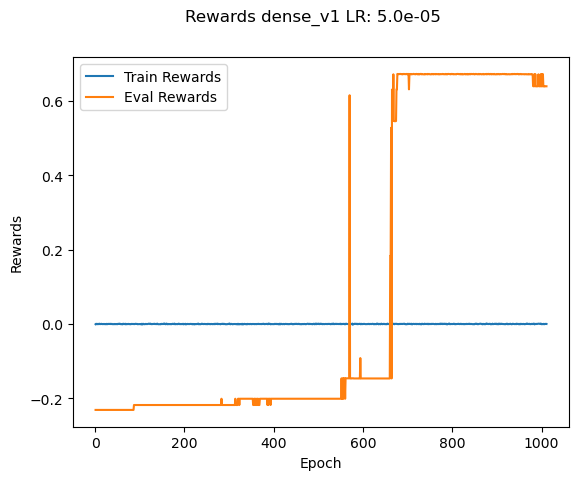

In [12]:
history_x = agent.training_history_x
history_y = agent.training_history_y
fig, ax = plt.subplots()
fig.suptitle(f'Rewards {agent.model_name} LR: {agent.lr:.1e}')
ax.plot(history_x, history_y)
ax.legend(['Train Rewards', 'Eval Rewards'])
ax.set_xlabel('Epoch')
ax.set_ylabel('Rewards')
plt.savefig('rewards_graph.png', bbox_inches='tight')
plt.show()

In [7]:
agent.load_checkpoint(f'./checkpoints/_{agent.model_name}_last.pth')

h:\Coding Projects\Python Projects\Deep-XIV-Rotation\models\dqn.py:292: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


In [ ]:
viper_env.compute_gcd(2.5, 798, 15)

In [ ]:
# 2.12, 2.11, 2.10, 2.09, 2.08
#[420, 528, 582, 768, 822]
agent.test(num_steps=50, _sks=420)

In [ ]:
pred = agent.predict(agent.env.state())
pred

In [ ]:
agent.env.reset_env()
pred = agent.predict(agent.env.state())
pred

In [ ]:
agent.env.state()

terraform aws
kubernites
helm?
look into